# **Retirement Plan**

Let's imagine that you are a student or you've already started working.

A fair way to plan your financial life could be figuring out how much money you need to save each month if you want to retire at the age x with y euros per month.
This program could help you, follow the next steps.
<br> 1. The payout phase is the period in which you've stopped working, here you have to write: 
>* The future value of your wallet **FV_2** (ex: when I'll have 80 yrs I want 300000 euros in my wallet);
* The number of years planned for your retirement **n_2** (ex: if you stop working at 55 and you want to enjoy your life up to 80 your n_2 is 25);
* The average yield you expect **r_2** (in general r_2 is less than r_1 because you are older and you don't want risky investments, in general in this phase you hold more bonds than stocks);
* The cashflow you expect **cf_2** (for example 3000 euros per month).

<br>2. The funding phase is the period in which you work and save money, here you have to write: 
>* The number of years you want to work **n**;
* The average yield you expect **r_1** (here you can try to obtain higher values for r_1, in particular if you are young);
* The cashflow you expect **cf_1** (for example 3000$ per month);
* The amount of money you've already invested **PV_1** (if you're starting now your PV_1 is zero)

## **IMPORTANT**

Each cash flow that you deposit is negative (ex, in the funding phase you have negative cashflows, in the payout phase you withdraw money, so you have positive cashflows).

## **Following example**

In the following example we have a young student with 4000 euros in the pocket that starts working at 25, wants to retire at 55 and wants 2500 euros per month up to the age of 80. Suppose a 5% average net yield during the funding phase and a 2% during the payout phase (in the last 10 years the index S&P500 performed a +12.5% per year, without considering taxes, commissions etc)  

After the age of 80 he/she wants an extra 100000 euros for the remaining years.

As you can see, in this case you need to save and invest 761 euros per month.

### Libraries

In [1]:
!pip install numpy-financial

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy_financial as npf

### Step 1: Payout Phase

In [3]:
m = 12 # freq. of payments (12 pmts per year)
cf_2 = 2500 # monthly earning during the retirement phase
n_2 = 25 # number of years 
FV_2 = 100000 # remaining amount after your retirement plan
r_2 = 0.02 # yield of 2%
PV_2 = npf.pv(rate=r_2/m, nper=n_2*m, pmt=cf_2, fv=FV_2, when='begin')

print(f"The future value I'll need is: {round(-PV_2, 2)}$")

The future value I'll need is: 651486.63$


### Step 2: Funding Phase

In [4]:
m = 12
n_1 = 30
FV_1 = -PV_2
r_1 = 0.05
PV_1 = -4000
cf_1 = npf.pmt(rate=r_1/m, nper=n_1*m, pv=PV_1, fv=FV_1)

print(f"I need to save: {round(-cf_1, 2)} euros per month")

I need to save: 761.32 euros per month


# **Retirement Plan: Sensitivity Analysis**

As you can imagine yields could be stochastic in time, so it could be useful analyze the sensitivity of our wallet and his relation with the yield.

So let's see an example.

###Payout Phase

In [5]:
m = 12
cf_2 = 2500
n_2 = 25
FV_2 = 100000
r_2 = 0.03
PV_2 = npf.pv(rate=r_2/m, nper=n_2*m, pmt=cf_2, fv=FV_2, when='begin')

print(f"The future value I'll need is: {-PV_2}$")


The future value I'll need is: 575789.9978483317$


### Funding Phase

In [6]:
m = 12
n_1 = 25
FV_1 = -PV_2
r_1 = np.arange(0.020, 0.140, 0.005) # in this case we use a range of yields during the funding phase
PV_1 = -4000
cf_1 = npf.pmt(rate=r_1/m, nper=n_1*m, pv=PV_1, fv=FV_1)

print(f"I need to save: {-cf_1}$ per month")

I need to save: [1463.9067174  1365.58311861 1272.01786668 1183.12800789 1098.81826495
 1018.98202185  943.50239473  872.25336876  805.10098045  741.904525
  682.51776944  626.79015308  574.56795849  525.69543844  480.01588571
  437.37263538  397.6099913   360.57407041  326.11356114  294.0803936
  264.33032153  236.7234171   211.12448142  187.40337436]$ per month


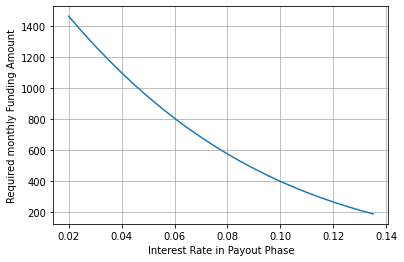

In [7]:
plt.plot(np.arange(0.020, 0.140, 0.005), np.abs(cf_1))
plt.grid()
plt.xlabel("Interest Rate in Payout Phase")
plt.ylabel("Required monthly Funding Amount")
plt.show()